In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
# If you have a CSV file, use this:
# data = pd.read_csv('apple_stock.csv')

# If you don't have one, here's how to create a mock dataset:
dates = pd.date_range(start="2024-01-01", periods=100)
np.random.seed(0)  # For reproducibility
prices = np.random.normal(loc=150, scale=5, size=(100,))

data = pd.DataFrame({
    'Date': dates,
    'Close': prices
})

data.head()


,Date,Close
0,2024-01-01,158.820262
1,2024-01-02,152.000786
2,2024-01-03,154.893690
3,2024-01-04,161.204466
4,2024-01-05,159.337790


In [5]:
# Convert 'Close' prices into a NumPy array
close_prices = data['Close'].values

# Check first 10 prices
close_prices[:10]


array([158.82026173, 152.00078604, 154.89368992, 161.204466  ,
       159.33778995, 145.1136106 , 154.75044209, 149.24321396,
       149.48390574, 152.05299251])

In [6]:
# Mean, Median, Std Deviation
mean_price = np.mean(close_prices)
median_price = np.median(close_prices)
std_dev_price = np.std(close_prices)

print(f"Mean Price: {mean_price:.2f}")
print(f"Median Price: {median_price:.2f}")
print(f"Standard Deviation: {std_dev_price:.2f}")


Mean Price: 150.30
Median Price: 150.47
Standard Deviation: 5.04


In [7]:
daily_returns = np.diff(close_prices) / close_prices[:-1] * 100
daily_returns[:10]  # First 10 daily returns


array([-4.29383229,  1.90321639,  4.07426286, -1.15795554, -8.92705952,
        6.6408874 , -3.55878022,  0.16127486,  1.71863771, -0.87651984])

In [8]:
max_gain = np.max(daily_returns)
max_loss = np.min(daily_returns)

print(f"Max Daily Gain: {max_gain:.2f}%")
print(f"Max Daily Loss: {max_loss:.2f}%")


Max Daily Gain: 12.93%
Max Daily Loss: -11.54%


In [9]:
days_above_2percent = np.where(daily_returns > 2)[0]  # indices
days_above_2percent


array([ 2,  5, 10, 15, 20, 23, 25, 27, 33, 35, 42, 46, 48, 50, 53, 63, 66,
       68, 69, 71, 73, 80, 83, 88, 90, 92, 96])

In [10]:
dates[days_above_2percent + 1]  # Adding 1 because np.diff reduces size by 1


DatetimeIndex(['2024-01-04', '2024-01-07', '2024-01-12', '2024-01-17',
               '2024-01-22', '2024-01-25', '2024-01-27', '2024-01-29',
               '2024-02-04', '2024-02-06', '2024-02-13', '2024-02-17',
               '2024-02-19', '2024-02-21', '2024-02-24', '2024-03-05',
               '2024-03-08', '2024-03-10', '2024-03-11', '2024-03-13',
               '2024-03-15', '2024-03-22', '2024-03-25', '2024-03-30',
               '2024-04-01', '2024-04-03', '2024-04-07'],
              dtype='datetime64[ns]', freq=None)

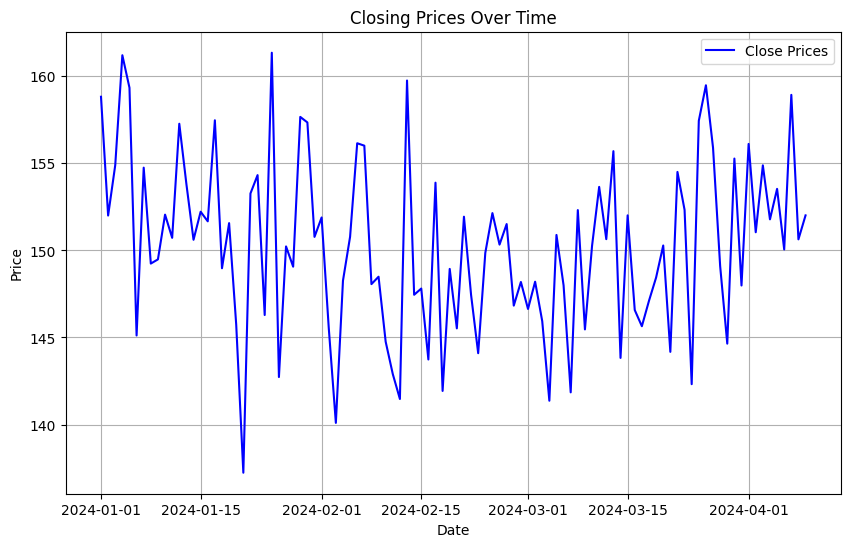

In [11]:
plt.figure(figsize=(10,6))
plt.plot(data['Date'], close_prices, label='Close Prices', color='blue')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Closing Prices Over Time')
plt.legend()
plt.grid(True)
plt.show()


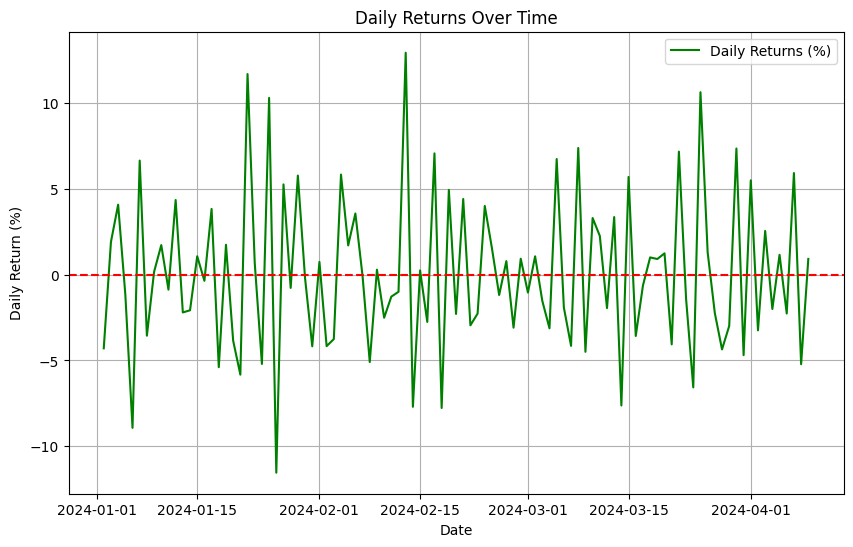

In [12]:
plt.figure(figsize=(10,6))
plt.plot(data['Date'][1:], daily_returns, label='Daily Returns (%)', color='green')
plt.xlabel('Date')
plt.ylabel('Daily Return (%)')
plt.title('Daily Returns Over Time')
plt.axhline(y=0, color='red', linestyle='--')
plt.legend()
plt.grid(True)
plt.show()


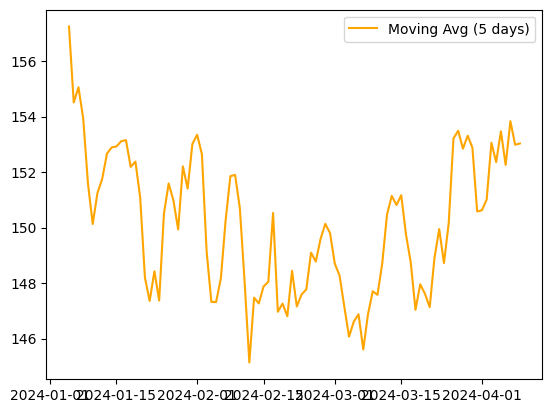

In [13]:
window_size = 5
moving_avg = np.convolve(close_prices, np.ones(window_size)/window_size, mode='valid')
plt.plot(data['Date'][window_size-1:], moving_avg, label='Moving Avg (5 days)', color='orange')
plt.legend()
